In [33]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


data from https://www.kaggle.com/datasets/ashoksrinivas/cloud-anomaly-detection-images

In [34]:
!cp /gdrive/MyDrive/tmp/archive.zip ./

In [35]:
!rm -rf cloud
!rm -rf noncloud
!unzip archive.zip

Archive:  archive.zip
  inflating: cloud/cloud/train_10264.jpg  
  inflating: cloud/cloud/train_10321.jpg  
  inflating: cloud/cloud/train_10642.jpg  
  inflating: cloud/cloud/train_10830.jpg  
  inflating: cloud/cloud/train_11105.jpg  
  inflating: cloud/cloud/train_11803.jpg  
  inflating: cloud/cloud/train_12291.jpg  
  inflating: cloud/cloud/train_13020.jpg  
  inflating: cloud/cloud/train_13167.jpg  
  inflating: cloud/cloud/train_13978.jpg  
  inflating: cloud/cloud/train_1441.jpg  
  inflating: cloud/cloud/train_1477.jpg  
  inflating: cloud/cloud/train_15825.jpg  
  inflating: cloud/cloud/train_15957.jpg  
  inflating: cloud/cloud/train_16872.jpg  
  inflating: cloud/cloud/train_1702.jpg  
  inflating: cloud/cloud/train_17310.jpg  
  inflating: cloud/cloud/train_17829.jpg  
  inflating: cloud/cloud/train_18281.jpg  
  inflating: cloud/cloud/train_18465.jpg  
  inflating: cloud/cloud/train_18558.jpg  
  inflating: cloud/cloud/train_1938.jpg  
  inflating: cloud/cloud/train_19503

# 영상 파일 읽기

In [36]:
import os

cloud_file_names = []
for dirname, _, filenames in os.walk('cloud'):
    for filename in filenames:
        cloud_file_names.append(os.path.join(dirname, filename))

noncloud_file_names = []
for dirname, _, filenames in os.walk('noncloud'):
    for filename in filenames:
        noncloud_file_names.append(os.path.join(dirname, filename))

In [37]:
print(len(cloud_file_names))
print(cloud_file_names[:3])
print(len(noncloud_file_names))
print(noncloud_file_names[:3])

100
['cloud/cloud/train_30702.jpg', 'cloud/cloud/train_2495.jpg', 'cloud/cloud/train_10321.jpg']
1500
['noncloud/noncloud/train_29143.jpg', 'noncloud/noncloud/train_27532.jpg', 'noncloud/noncloud/train_21527.jpg']


In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
import cv2

def load_images(file_names):
    images = []
    for file_name in file_names:
        image = cv2.imread(file_name)
        image = cv2.resize(image, (224,224) )
        images.append(image)

    return np.array(images)

cloud_images = load_images(cloud_file_names)
noncloud_images = load_images(noncloud_file_names)

In [40]:
print(cloud_images.shape)
print(noncloud_images.shape)

(100, 224, 224, 3)
(1500, 224, 224, 3)


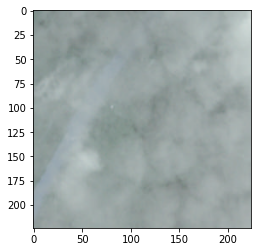

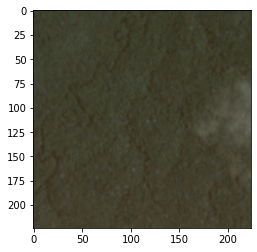

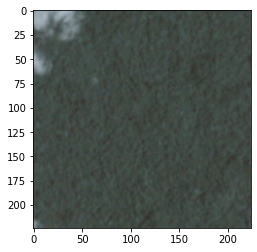

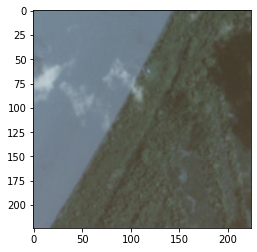

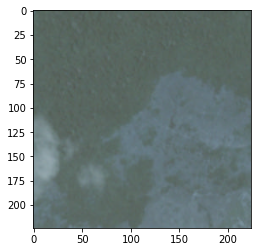

In [41]:
for image in cloud_images[:5]:
    plt.imshow(image)
    plt.show()

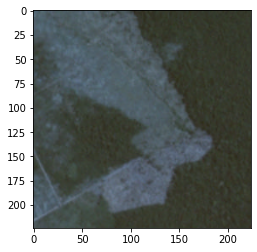

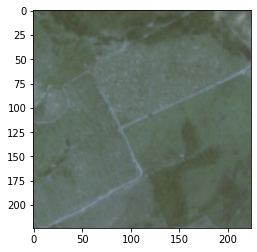

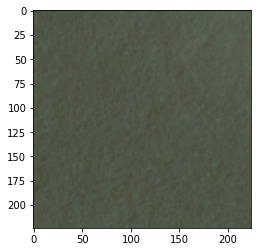

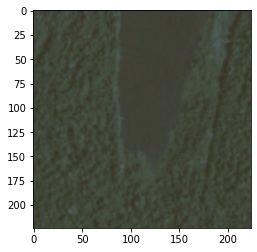

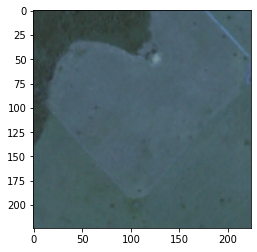

In [42]:
for image in noncloud_images[:5]:
    plt.imshow(image)
    plt.show()

In [43]:
train_x = noncloud_images / 255.0
test_x = cloud_images / 255.0

# 모델 정의

In [44]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [45]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

model = Sequential()

# model.add(Input(shape=(28, 28, 1)))
model.add(Input(shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Dense(2))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
# model.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))
model.add(Conv2D(3, (3, 3), activation="sigmoid", padding="same"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 32)      9248      
                                                      

In [46]:
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=["mape"])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  
hist = model.fit(train_x, train_x, epochs=500, batch_size=128, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/500
11/11 [==============================] - 9s 605ms/step - loss: 0.6656 - mape: 89.8210 - val_loss: 0.6390 - val_mape: 59.7500
Epoch 2/500
11/11 [==============================] - 6s 567ms/step - loss: 0.6225 - mape: 58.7797 - val_loss: 0.6231 - val_mape: 38.2807
Epoch 3/500
11/11 [==============================] - 6s 570ms/step - loss: 0.6032 - mape: 41.7148 - val_loss: 0.6185 - val_mape: 50.1183
Epoch 4/500
11/11 [==============================] - 6s 566ms/step - loss: 0.5994 - mape: 41.0225 - val_loss: 0.5986 - val_mape: 25.5807
Epoch 5/500
11/11 [==============================] - 6s 570ms/step - loss: 0.5891 - mape: 30.4020 - val_loss: 0.5929 - val_mape: 16.4444
Epoch 6/500
11/11 [==============================] - 6s 567ms/step - loss: 0.5900 - mape: 32.9592 - val_loss: 0.6004 - val_mape: 34.2986
Epoch 7/500
11/11 [==============================] - 6s 569ms/step - loss: 0.5811 - mape: 25.3022 - val_loss: 0.5881 - val_mape: 15.4171
Epoch 8/500
11/11 [======================

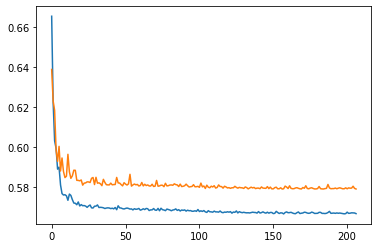

In [47]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [48]:
reconstructed = model.predict(train_x)
diff = np.abs(reconstructed - train_x)

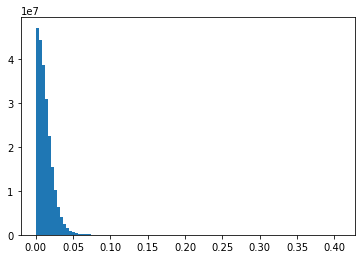

In [58]:
plt.hist(diff.flatten(), bins=100)
plt.show()

In [51]:
sorted_diff = np.sort(diff.flatten())
threshold_index = int(len(sorted_diff)*0.999)
threshold = sorted_diff[threshold_index]

print(threshold)

0.07904657826704137


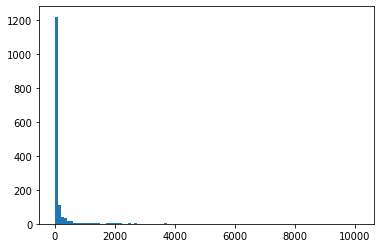

In [61]:
large_diff_count = (diff>threshold).sum(axis=(1,2,3))
plt.hist(large_diff_count, bins=100)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


114


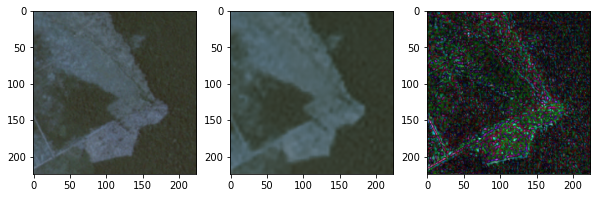

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


78


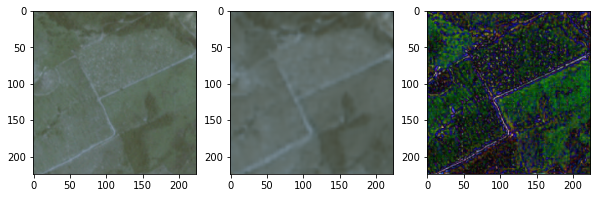

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


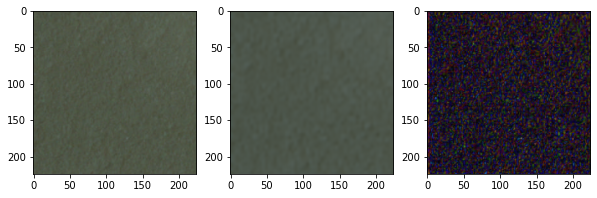

5


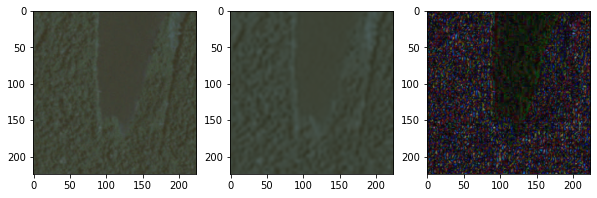

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


24


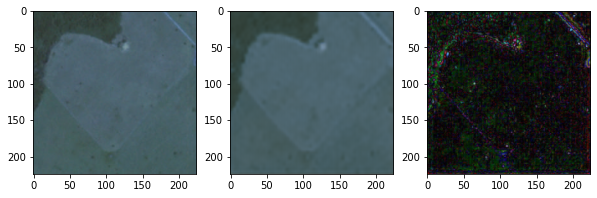

4


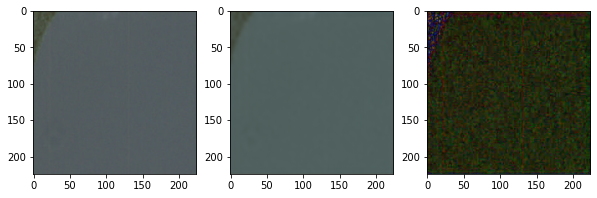

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


12


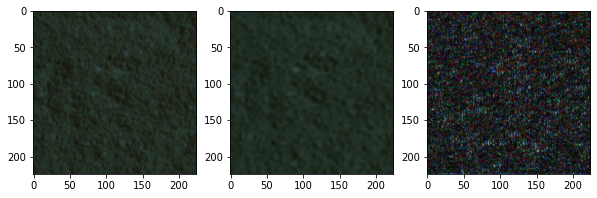

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


280


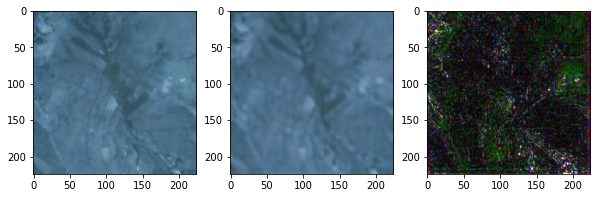

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


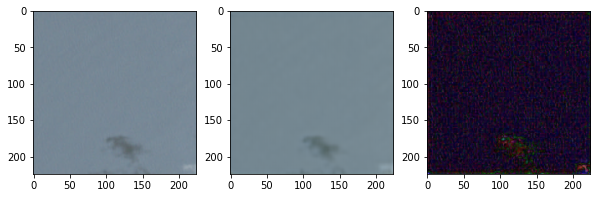

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


85


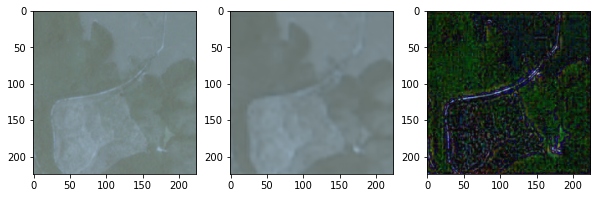

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14


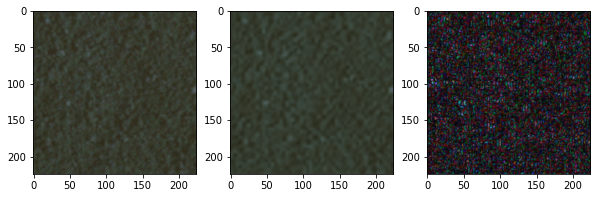

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


41


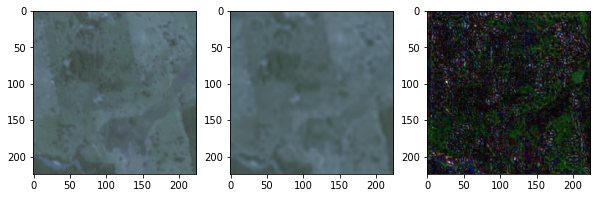

8


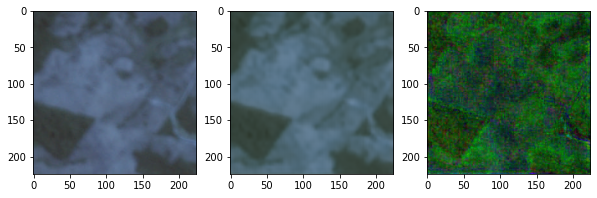

4


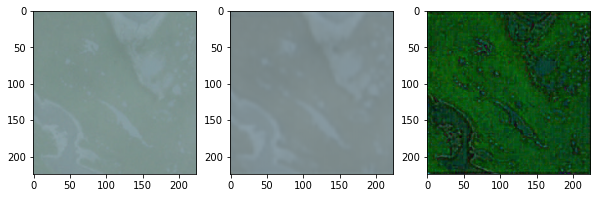

0


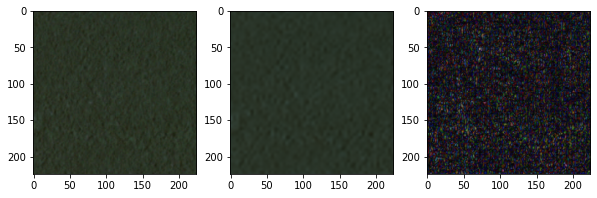

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10


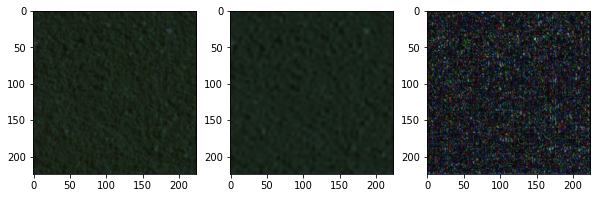

In [67]:
for i in range(16):
    print(large_diff_count[i])
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1)
    plt.imshow(train_x[i])
    plt.subplot(1,3,2)
    plt.imshow(reconstructed[i])
    plt.subplot(1,3,3)
    plt.imshow(diff[i]*10) # diff 잘보이라고 10배 함.
    plt.show()

In [62]:
print(large_diff_count[:100])

[  114    78     1     5    24     4    12   280     4    85    14    41
     8     4     0    10     5   218     8   487     7     0    12   229
     5    17    15   141     3    50    24     4     1   264     0    43
     0    44  1395     2     0  8863    78     2    15     1    59   121
   797     9   110     5     1     3    15     0   490     3     0   532
     2   580     3     3     0     1 10150    12    29    20     6   368
   230     0   131     2   340     1   102    22     8    54    17   155
    82     1     2     0    37    11     7     1     2   384   232    21
     3   405     2    87]


In [63]:
sorted_large_diff_count = np.sort(large_diff_count)
large_diff_threshold_index = int(len(sorted_large_diff_count)*0.99)
large_diff_threshold = sorted_large_diff_count[large_diff_threshold_index]
print(large_diff_threshold)

2714


# test 데이터

In [ ]:
test_x_reconstructed = model.predict(test_x)
test_x_diff = np.abs(test_x_reconstructed - test_x)

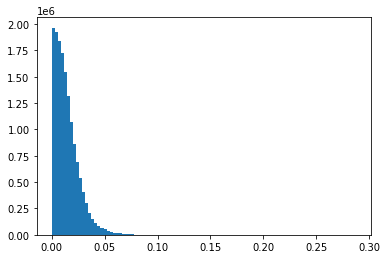

In [71]:
plt.hist(test_x_diff.flatten(), bins=100)
plt.show()

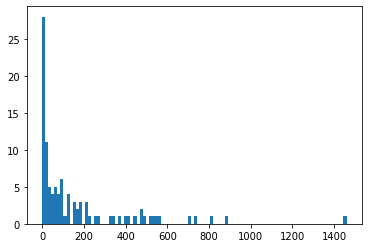

In [68]:
test_large_diff_count = (test_x_diff>threshold).sum(axis=(1,2,3))
plt.hist(test_large_diff_count, bins=100)
plt.show()

In [69]:
print(test_large_diff_count)

[  88    7   80   60    1  475   15    0  493   99   20  878  158  212
   14  146    2   69   31  515   10   54  187    0   18    5 1460   16
  119  214   62    0  152    2   12   99  225  468  178    2   10   93
  343    1  177   46  443   14    1   40  399  547  707   87   68   58
  119   24    7  211  116  566   33    4  120   52    6   73   22   22
   14    8   21  809    2  368   41   62   38  331   18    0    5  121
  175  740  416  533   91  260  167   17   87    6    2   12   96    3
  271   17]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


88


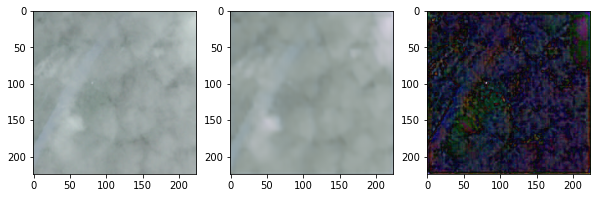

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7


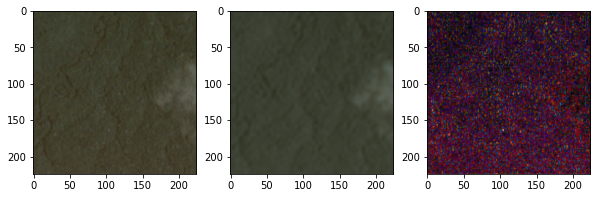

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


80


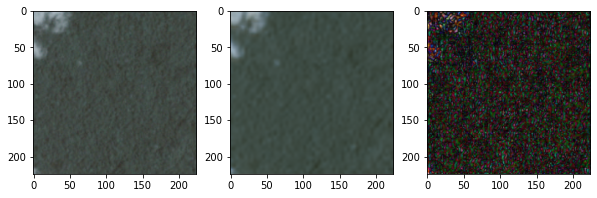

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


60


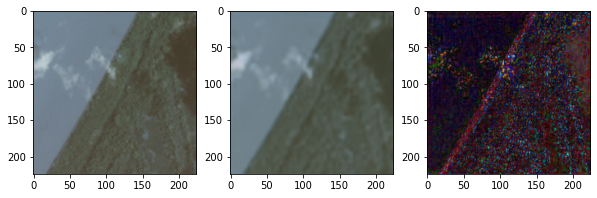

1


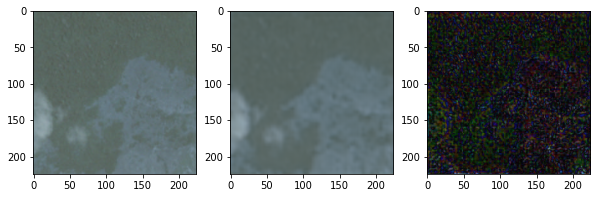

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


475


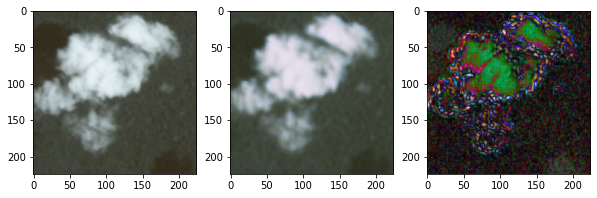

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15


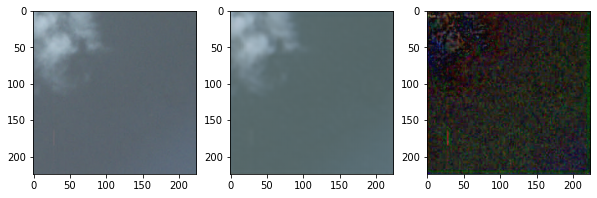

0


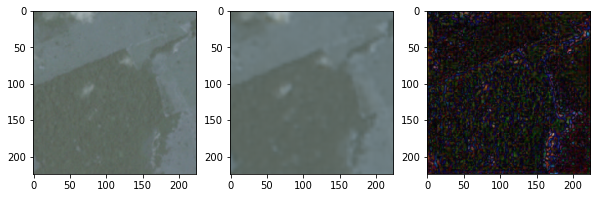

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


493


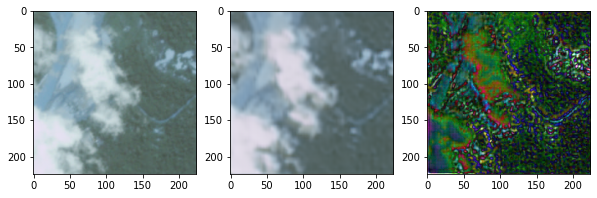

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


99


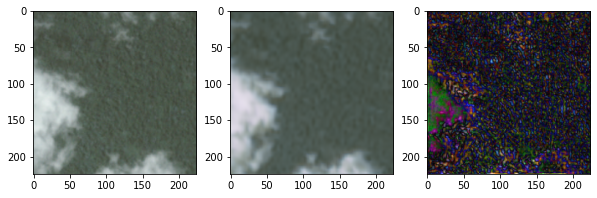

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


20


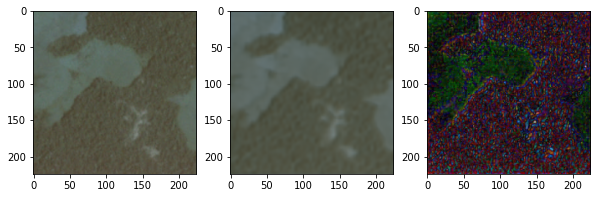

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


878


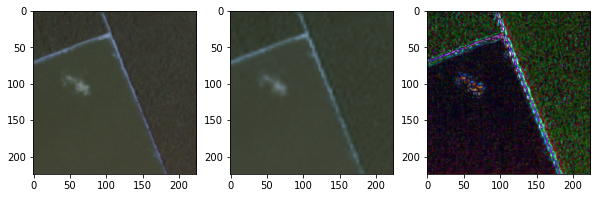

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


158


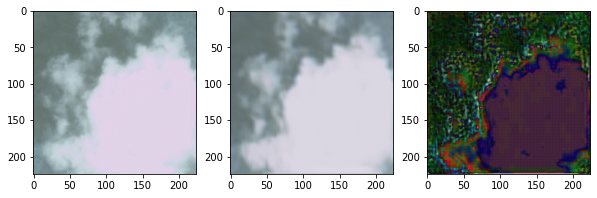

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


212


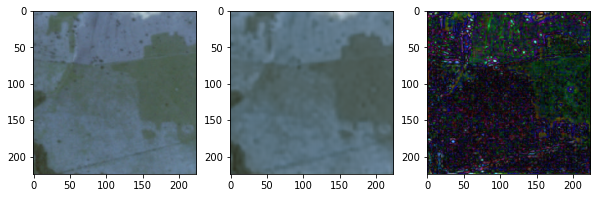

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14


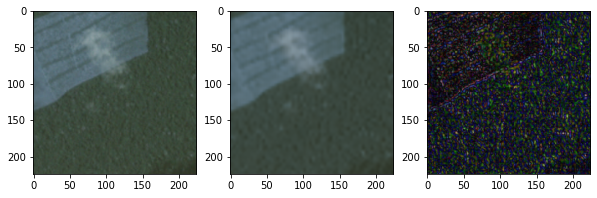

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


146


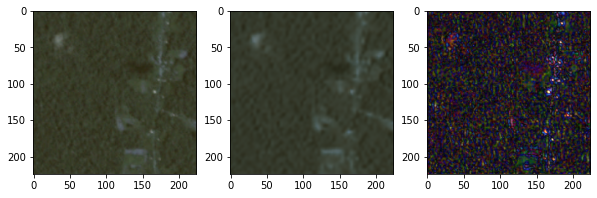

In [70]:
for i in range(16):
    print(test_large_diff_count[i])
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1)
    plt.imshow(test_x[i])
    plt.subplot(1,3,2)
    plt.imshow(test_x_reconstructed[i])
    plt.subplot(1,3,3)
    plt.imshow(test_x_diff[i]*10) # 잘보이라고 10배함
    plt.show()